In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals
import random
from itertools import combinations

In [3]:
def random_matrix(n):
    """
    Generate a random n by n matrix with entries from -1 to 1 and diagonals as 0.
    """
    # Generate a random n by n matrix with entries from -1 to 1
    mat = np.random.uniform(-1, 1, size=(n, n))
    A = (mat + mat.T)/2
    # Set the diagonal entries to 0
    np.fill_diagonal(A, 0)
    return A

def is_pos_def(A):
    """
    Check if a matrix is positive definite.
    """
    return np.all(np.linalg.eigvals(A) > 0)

def min_eig(A):
    """
    Compute the minimum eigenvalue of a matrix.
    """
    min_eig = np.min(eigvals(A))
    return min_eig.real

In [8]:
n = 5
kappa = 0.5
iterations = 1000

def generate_matrices(n, kappa):
    """
    Generate G1, G2, and G12 matrices.
    """
    G1 = random_matrix(n)
    G2 = random_matrix(n)
    G12 = random_matrix(n)
    G21 = G12.T
    weak_G12 = 0.5 * G12
    weak_G21 = weak_G12.T

    weak_G12_2 = 0.5 * weak_G12
    weak_G21_2 = weak_G12_2.T

    weak_G12_3 = 0.5 * weak_G12_2
    weak_G21_3 = weak_G12_3.T

    weak_G12_4 = 0.5 * weak_G12_3
    weak_G21_4 = weak_G12_4.T
    
    very_weak_G12 = 0.1 * weak_G12
    very_weak_G21 = very_weak_G12.T

    return G1, G2, G12, G21, weak_G12, weak_G21, very_weak_G12, very_weak_G21, weak_G12_2, weak_G21_2, weak_G12_3, weak_G21_3, weak_G12_4, weak_G21_4

def generate_G(G1, G2, G12, G21):
    """
    Generate the block matrix G.
    """
    G = np.block([[G1, G12], [G21, G2]])
    return G

eig_G1 = []
eig_G2 = []
eig_G = []
eig_G_weak = []
eig_G_weak_2 = []
eig_G_weak_3 = []
eig_G_weak_4 = []
eig_G_very_weak = []
eig_oneway_G = []

pos_G1 = []
pos_G2 = []
pos_G = []
pos_G_weak = []
pos_G_weak_2 = []
pos_G_weak_3 = []
pos_G_weak_4 = []
pos_G_very_weak = []
pos_oneway_G = []

for i in range(iterations):
    G1, G2, G12, G21, weak_G12, weak_G21, very_weak_G12, very_weak_G21, weak_G12_2, weak_G21_2, weak_G12_3, weak_G21_3, weak_G12_4, weak_G21_4 = generate_matrices(n, kappa)
    G = generate_G(G1, G2, G12, G21)
    G_weak = generate_G(G1, G2, weak_G12, weak_G21)
    G_weak_2 = generate_G(G1, G2, weak_G12_2, weak_G21_2)
    G_weak_3 = generate_G(G1, G2, weak_G12_3, weak_G21_3)
    G_weak_4 = generate_G(G1, G2, weak_G12_4, weak_G21_4)
    G_very_weak = generate_G(G1, G2, very_weak_G12, very_weak_G21)
    oneway_G = np.block([[G1, G12], [(np.zeros((n, n))), G2]])

    min_G1 = min_eig(np.identity(n) + G1)
    min_G2 = min_eig(np.identity(n) + G2)
    min_G = min_eig(np.identity(2*n) + G)
    min_G_weak = min_eig(np.identity(2*n) + G_weak)
    min_G_weak_2 = min_eig(np.identity(2*n) + G_weak_2)
    min_G_weak_3 = min_eig(np.identity(2*n) + G_weak_3)
    min_G_weak_4 = min_eig(np.identity(2*n) + G_weak_4)
    min_G_very_weak = min_eig(np.identity(2*n) + G_very_weak)

    eig_G1.append(min_G1)
    eig_G2.append(min_G2)
    eig_G.append(min_G)
    eig_G_weak.append(min_G_weak)
    eig_G_weak_2.append(min_G_weak_2)
    eig_G_weak_3.append(min_G_weak_3)
    eig_G_weak_4.append(min_G_weak_4)
    eig_G_very_weak.append(min_G_very_weak)
    eig_oneway_G.append(min_eig(np.identity(2*n) + oneway_G))

    pos_G1.append(is_pos_def(np.identity(n) + G1))
    pos_G2.append(is_pos_def(np.identity(n) + G2))
    pos_G.append(is_pos_def(np.identity(2*n) + G))
    pos_G_weak_2.append(is_pos_def(np.identity(2*n) + G_weak_2))
    pos_G_weak_3.append(is_pos_def(np.identity(2*n) + G_weak_3))
    pos_G_weak_4.append(is_pos_def(np.identity(2*n) + G_weak_4))
    pos_G_weak.append(is_pos_def(np.identity(2*n) + G_weak))
    pos_G_very_weak.append(is_pos_def(np.identity(2*n) + G_very_weak))
    pos_oneway_G.append(is_pos_def(np.identity(2*n) + oneway_G))
    

# Plotting the heatmap
data_1 = np.array([eig_G1, eig_G2, eig_oneway_G, eig_G_very_weak, eig_G_weak_4, eig_G_weak_3, eig_G_weak_2, eig_G_weak, eig_G])
data_2 = np.array([pos_G1, pos_G2, pos_oneway_G, pos_G_very_weak, pos_G_weak_4, pos_G_weak_3, pos_G_weak_2, pos_G_weak, pos_G])

# sort by the third row in eig_G and use the indices to also sort pos_G
sorted_data = data_1[:, np.argsort(data_1[8])]
sorted_data_2 = data_2[:, np.argsort(data_1[8])]



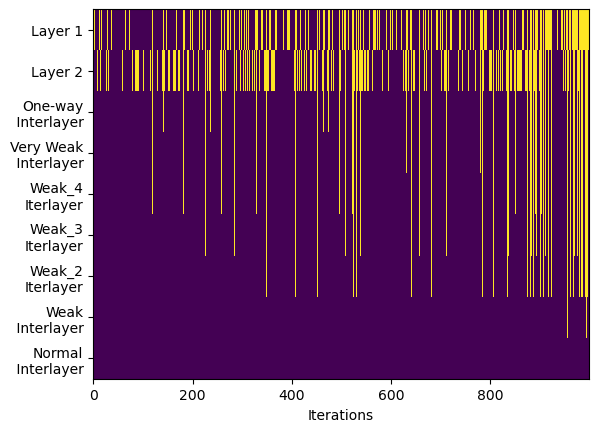

In [9]:
plt.imshow(sorted_data_2, cmap='viridis', interpolation='nearest', aspect='auto')

# Naming the y-ticks
plt.yticks(np.arange(9), ["Layer 1", "Layer 2", "One-way\n Interlayer", "Very Weak\n Interlayer", "Weak_4\nIterlayer", "Weak_3\nIterlayer", "Weak_2\nIterlayer", "Weak\n Interlayer", "Normal\n Interlayer"])

# plt.colorbar()
# plt.title('Determinants of Submatrices')
plt.xlabel('Iterations')
# plt.ylabel('Matrices')
plt.savefig('test-prop9-binary.png', dpi=300, bbox_inches='tight')
plt.show()